# kedro

In [33]:
import pandas as pd
import numpy as np

In [1]:
%reload_ext kedro.ipython

[02/25/25 10:32:40] INFO     Using                                                                  ]8;id=249666;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=167687;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Li                
                             b\site-packages\kedro\framework\project\rich_logging.yml' as logging                  
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=40586;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=844903;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py#61\61]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=954724;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=112458;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Resolved project path as:                                              ]8;id=220496;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=546420;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py#178\178]8;;\
                             c:\Users\jonas\Documents\Projects\lithuania-election-results.                         
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/25/25 10:32:48] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=588384;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=677920;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[02/25/25 10:32:49] INFO     Kedro project lithuania-election-results                               ]8;id=994026;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=576708;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py#144\144]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=794786;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=838527;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py#145\145]8;;\
                             'pipelines'                                                                           

[02/25/25 10:32:51] INFO     Registered line magic 'run_viz'                                        ]8;id=758546;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=435042;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\ipython\__init__.py#151\151]8;;\

# Elections

Parliamentary elections in Lithuania as explained by Wikipedia:

"Seventy-one of the members in the 141-seat parliament, elected to a four-year term, are elected in single-seat constituencies, in a majority vote. The remaining 70 members are elected in a nationwide election based on proportional representation."

We will look at the proportional representation voting. When participating voters are given a balot containing the list of available parties and five slots for what are called primary votes. A voter is expected to choose one party and cast primary votes for up to 5 candidates from that party that they want to see in the parliament. Which parties are elected to the parliament is only dependent on the party choice votes, however which specific candidates from that party are elected is up to the primary votes. 

We can do a quick simulation of this. Lets say 5 voters vote for party A, first one casts no primary votes, next one only writes in 1, next writes in 1,2,3,4,5, next writes in 3,8,11,99 and the last voter 3, 20, 55. We can see that 13 primary votes were cast, candidate number 1 got 2 votes, candidate 2 got 1 vote, candidate 3 got 3 votes and so on. If this party got seats in the parliament candidate number 3 would get the seat as he got most votes, next if seats are available 1 gets a seat and so on. What is worth noting is that that the total number of primary votes is a random variable bound between zero on 5 * total number of votes.

Each person chooses the number of primary votes to cast between zero and 5, though each choice is random in aggregate we expect the primary votes to converge to some sort of distribution where seeing many people casting no or all possible primary votes is rare.



# Cheating 

A possible form of cheating in this format is the adding of primary votes to not fully filled ballots. In the previous example only one ballot was fully filled, now lets assume that the people counting the votes in a precint collaborate to help a certain candidate get more primary votes and thus get pushed higher up the list when members of parliament are chosen. In this example lets assume this is candidate number 9, he got no primary votes and thus his election would be over, however the members of the precinct add this candidate wherever possible thus getting us these ballots: 9; 1,9; 1,2,3,4,5; 3,8,11,99,9; 3,20,55,9. Now candidate number 9 has 4 primary votes and is confortably in the lead. One clue is left of this cheating though: the total number of primary votes has gone up from 13 to 17.

# Dataset

All votes are cast in precincts, each presinct is associated with a constituency. In total there are 71 constituencies and 1947 precincts. The dataset has the total number of votes, and the total number of primary votes for each party in each precinct, with 15 parties this gives 15*1947 = 29205 lines in the dataset. A column 'rate' is added that represents the average number of primary votes for each ballot cast.

# Definitions and notebook use

In the analysis below precincts are called apylinke, constituencies are named apygarda, primary votes are called pirm votes.

A user might also notice that the apylinke and apydargda names are not used instead lines like this are presented: rezultataiDaugmRpl_rpgId-24094_rplId-716502.html

This is left for ease of use, the user can type this into a web browser search bar:

* https://www.vrk.lt/2024-seimo/rezultatai?srcUrl=/rinkimai/1544/1/2150/rezultatai/lt/

Add the mentioned phrase to it:

* https://www.vrk.lt/2024-seimo/rezultatai?srcUrl=/rinkimai/1544/1/2150/rezultatai/lt/rezultataiDaugmRpl_rpgId-24094_rplId-716502.html

To get a working link to vrk.lt page from where the data is obtained.

# Analysis

## get data

In [24]:
df = catalog.load("all_total_pirm_votes_by_apylinke")
df['rate'] = df['total_pirm_votes'] / df['total_apylinke_votes']
df

[2/25/2025 10:43:54 AM] INFO     Loading data from all_total_pirm_votes_by_apylinke             ]8;id=384869;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=757429;file://c:\Users\jonas\Documents\Projects\lithuania-election-results\.venv\Lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\
                                 (PickleDataset)...                                                                

,apygarda,apylinke,VRK_nr,party_name,total_apylinke_votes,total_pirm_votes,rate
0,rezultataiDaugmRpg_rpgId-24100.html,rezultataiDaugmRpl_rpgId-24100_rplId-715986.html,3,Lietuvos socialdemokratų partija,238,652.0,2.739496
1,rezultataiDaugmRpg_rpgId-24100.html,rezultataiDaugmRpl_rpgId-24100_rplId-715986.html,13,Tėvynės sąjunga-Lietuvos krikščionys demokratai,373,1278.0,3.426273
2,rezultataiDaugmRpg_rpgId-24100.html,rezultataiDaugmRpl_rpgId-24100_rplId-715986.html,12,Politinė partija „Nemuno Aušra“,182,505.0,2.774725
3,rezultataiDaugmRpg_rpgId-24100.html,rezultataiDaugmRpl_rpgId-24100_rplId-715986.html,11,Demokratų sąjunga „Vardan Lietuvos“,166,492.0,2.963855
4,rezultataiDaugmRpg_rpgId-24100.html,rezultataiDaugmRpl_rpgId-24100_rplId-715986.html,14,Liberalų sąjūdis,128,393.0,3.070312
...,...,...,...,...,...,...,...
29200,rezultataiDaugmRpg_rpgId-24112.html,rezultataiDaugmRpl_rpgId-24112_rplId-715726.html,9,"Taikos koalicija (Darbo partija, Lietuvos krik...",13,55.0,4.230769
29201,rezultataiDaugmRpg_rpgId-24112.html,rezultataiDaugmRpl_rpgId-24112_rplId-715726.html,6,Lietuvos regionų partija,28,74.0,2.642857
29202,rezultataiDaugmRpg_rpgId-24112.html,rezultataiDaugmRpl_rpgId-24112_rplId-715726.html,4,Lietuvos žaliųjų partija,11,34.0,3.090909
29203,rezultataiDaugmRpg_rpgId-24112.html,rezultataiDaugmRpl_rpgId-24112_rplId-715726.html,1,"Tautos ir teisingumo sąjunga (centristai, taut...",15,41.0,2.733333


# metrics

### average pirm rate per party

In [22]:
total_votes_per_party = df.groupby("party_name").sum()['total_apylinke_votes']
total_pirm_votes_per_party = df.groupby("party_name").sum()['total_pirm_votes']
average_pirm_rate_per_party = (total_pirm_votes_per_party / total_votes_per_party).sort_values(ascending=False)
average_pirm_rate_per_party


party_name
Tėvynės sąjunga-Lietuvos krikščionys demokratai                                                        3.293185
Laisvės partija                                                                                        3.232409
Lietuvos valstiečių ir žaliųjų sąjunga                                                                 3.055199
Liberalų sąjūdis                                                                                       3.006050
Nacionalinis susivienijimas                                                                            2.880199
Demokratų sąjunga „Vardan Lietuvos“                                                                    2.829396
Lietuvos lenkų rinkimų akcija-Krikščioniškų šeimų sąjunga                                              2.746645
Taikos koalicija (Darbo partija, Lietuvos krikščioniškosios demokratijos partija, Žemaičių partija)    2.581683
Lietuvos regionų partija                                                                    

### average pirm rate per apygarda

In [44]:
total_votes_per_apygarda = df.groupby("apygarda").sum()['total_apylinke_votes']
total_pirm_votes_per_apygarda = df.groupby("apygarda").sum()['total_pirm_votes']
average_pirm_rate_per_apygarda = (total_pirm_votes_per_apygarda / total_votes_per_apygarda).sort_values(ascending=False)
# average_pirm_rate_per_apygarda = pd.DataFrame(total_votes_per_apygarda)
# average_pirm_rate_per_apygarda['count_of_apylinke'] = df.groupby("apygarda").apply(lambda x: x.apylinke.nunique())
# average_pirm_rate_per_apygarda = average_pirm_rate_per_apygarda.sort_values(by='total_apylinke_votes',ascending=False)

In [45]:
average_pirm_rate_per_apygarda


apygarda
rezultataiDaugmRpg_rpgId-24094.html    3.336973
rezultataiDaugmRpg_rpgId-24262.html    3.202523
rezultataiDaugmRpg_rpgId-24082.html    3.185556
rezultataiDaugmRpg_rpgId-24280.html    3.116875
rezultataiDaugmRpg_rpgId-24036.html    3.111844
                                         ...   
rezultataiDaugmRpg_rpgId-24116.html    2.380636
rezultataiDaugmRpg_rpgId-24132.html    2.341482
rezultataiDaugmRpg_rpgId-24296.html    2.326384
rezultataiDaugmRpg_rpgId-24144.html    2.279341
rezultataiDaugmRpg_rpgId-24120.html    2.200012
Length: 71, dtype: float64

### rate per apylinke

In [60]:
total_votes_per_apylinke = df.groupby("apylinke").sum()['total_apylinke_votes']
total_pirm_votes_per_apylinke = df.groupby("apylinke").sum()['total_pirm_votes']
average_pirm_rate_per_apylinke = pd.DataFrame(total_pirm_votes_per_apylinke / total_votes_per_apylinke)
average_pirm_rate_per_apylinke.columns = ['rate']
average_pirm_rate_per_apylinke['total_apylinke_votes'] = total_votes_per_apylinke
average_pirm_rate_per_apylinke = average_pirm_rate_per_apylinke.sort_values(by='rate', ascending = False)

,rate,total_apylinke_votes
apylinke,,
rezultataiDaugmRpl_rpgId-24062_rplId-716202.html,4.477387,398
rezultataiDaugmRpl_rpgId-24062_rplId-716058.html,4.384615,208
rezultataiDaugmRpl_rpgId-24062_rplId-713174.html,4.314103,156
rezultataiDaugmRpl_rpgId-24094_rplId-714586.html,4.222222,18
rezultataiDaugmRpl_rpgId-24062_rplId-716196.html,4.214794,703
...,...,...
rezultataiDaugmRpl_rpgId-24112_rplId-715744.html,1.237624,101
rezultataiDaugmRpl_rpgId-24116_rplId-715462.html,1.158163,196
rezultataiDaugmRpl_rpgId-24128_rplId-716826.html,1.083333,48


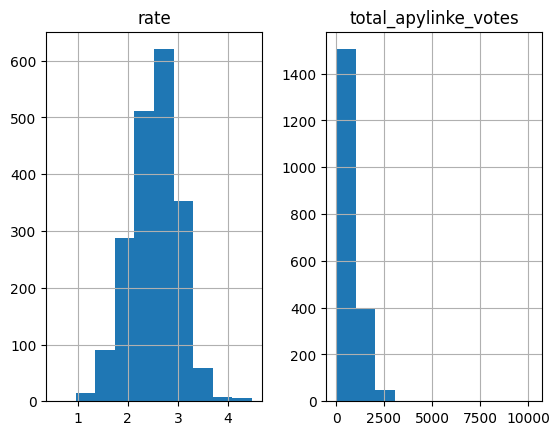

In [61]:
average_pirm_rate_per_apylinke.hist()
average_pirm_rate_per_apylinke

### rate per apylinke party

In [68]:
df.sort_values(by='rate',ascending=False)

,apygarda,apylinke,VRK_nr,party_name,total_apylinke_votes,total_pirm_votes,rate
29197,rezultataiDaugmRpg_rpgId-24112.html,rezultataiDaugmRpl_rpgId-24112_rplId-715726.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,1,5.0,5.0
3014,rezultataiDaugmRpg_rpgId-24294.html,rezultataiDaugmRpl_rpgId-24294_rplId-715504.html,10,Partija „Laisvė ir teisingumas“,1,5.0,5.0
17742,rezultataiDaugmRpg_rpgId-24064.html,rezultataiDaugmRpl_rpgId-24064_rplId-714738.html,4,Lietuvos žaliųjų partija,1,5.0,5.0
17678,rezultataiDaugmRpg_rpgId-24064.html,rezultataiDaugmRpl_rpgId-24064_rplId-713742.html,2,Nacionalinis susivienijimas,6,30.0,5.0
6071,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-714446.html,6,Lietuvos regionų partija,2,10.0,5.0
...,...,...,...,...,...,...,...
29169,rezultataiDaugmRpg_rpgId-24112.html,rezultataiDaugmRpl_rpgId-24112_rplId-715740.html,5,Lietuvos liaudies partija,0,0.0,NaN
29171,rezultataiDaugmRpg_rpgId-24112.html,rezultataiDaugmRpl_rpgId-24112_rplId-715740.html,6,Lietuvos regionų partija,0,0.0,NaN
29174,rezultataiDaugmRpg_rpgId-24112.html,rezultataiDaugmRpl_rpgId-24112_rplId-715740.html,10,Partija „Laisvė ir teisingumas“,0,0.0,NaN
29182,rezultataiDaugmRpg_rpgId-24112.html,rezultataiDaugmRpl_rpgId-24112_rplId-714992.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,0,0.0,NaN


# identify high rate high vote count instances

Most high rate party-apylinke combinations are a result of very few people voting with a high rate of pirm votes. Of the 29205 combinations there are 957 intances when the rate is equal to 5. In these instances the average number of total votes is 1.74 with one instance where 12 votes were cast with 5 pirm votes each in the Vosiliškio apylinke voting for TS-LKD.

In [80]:
rate5 = df[df.rate == 5.0]
rate5[rate5.total_apylinke_votes == rate5.total_apylinke_votes.max()]

,apygarda,apylinke,VRK_nr,party_name,total_apylinke_votes,total_pirm_votes,rate
3406,rezultataiDaugmRpg_rpgId-24294.html,rezultataiDaugmRpl_rpgId-24294_rplId-715512.html,13,Tėvynės sąjunga-Lietuvos krikščionys demokratai,12,60.0,5.0


In [81]:
df[df.rate == 5.0].total_apylinke_votes.describe()


count    957.000000
mean       1.740857
std        1.319207
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       12.000000
Name: total_apylinke_votes, dtype: float64

<Axes: >

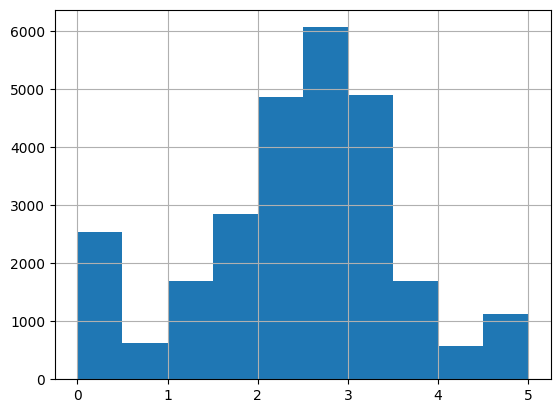

In [82]:
df.rate.hist()

Thus low vote count implies high volatility in the resulting rates, so in further observations that got less than 100 votes, that is all instances where a party got less than 100 votes in an apylinke are removed. This trims the dataset from 29205 observations to 3618 observations. In the resulting dataset the average rate is 2.826 with a median of 2.826. The minimum rate observed id 1.29, maximum: 4.94.


count    3618.000000
mean        2.825848
std         0.501545
min         1.293605
25%         2.448407
50%         2.825888
75%         3.225169
max         4.942675
Name: rate, dtype: float64

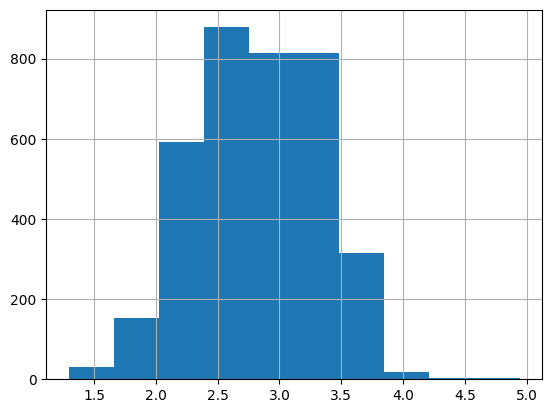

In [106]:
high_rate = df[df.total_apylinke_votes >= 100]
high_rate.rate.hist()
high_rate.rate.describe()

If we assume only the very high rates with many votes to be suspect we can remove observations with rate lower than 4.0 thus getting the table below. As can be seen 8 of the 12 observation be long to one party the Lietuvos lenkų rinkimų akcija-Krikščioniškų šeimų sąjunga, three to Tėvynės sąjunga-Lietuvos krikščionys demokratai and one to Lietuvos valstiečių ir žaliųjų sąjunga. The apygarda variables for observations that are not from the Lietuvos lenkų rinkimų akcija-Krikščioniškų šeimų sąjunga are all unique, however for the 8 Lietuvos lenkų rinkimų akcija-Krikščioniškų šeimų sąjunga observations the apygarda is always the Šalčininkų–Vilniaus (Nr.56) apygarda.

In [107]:
high_rate = high_rate[high_rate.rate > 4.0]
high_rate.sort_values(by='rate',ascending=False)

,apygarda,apylinke,VRK_nr,party_name,total_apylinke_votes,total_pirm_votes,rate
6502,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-716058.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,157,776.0,4.942675
6157,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-716202.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,326,1563.0,4.794479
5902,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-716196.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,534,2512.0,4.704120
6262,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-713174.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,138,617.0,4.471014
13186,rezultataiDaugmRpg_rpgId-24262.html,rezultataiDaugmRpl_rpgId-24262_rplId-717506.html,13,Tėvynės sąjunga-Lietuvos krikščionys demokratai,541,2385.0,4.408503
6397,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-716060.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,238,986.0,4.142857
5872,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-716052.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,314,1293.0,4.117834
6232,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-717060.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,257,1049.0,4.081712
27886,rezultataiDaugmRpg_rpgId-24118.html,rezultataiDaugmRpl_rpgId-24118_rplId-716138.html,13,Tėvynės sąjunga-Lietuvos krikščionys demokratai,115,467.0,4.060870
4520,rezultataiDaugmRpg_rpgId-24272.html,rezultataiDaugmRpl_rpgId-24272_rplId-717166.html,8,Lietuvos valstiečių ir žaliųjų sąjunga,120,487.0,4.058333


Next we look at the top 5 observations in terms of rate. Of these 4 are from Lietuvos lenkų rinkimų akcija-Krikščioniškų šeimų sąjunga and one from Tėvynės sąjunga-Lietuvos krikščionys demokratai. The top 4 observations belong to Lietuvos lenkų rinkimų akcija-Krikščioniškų šeimų sąjunga the highest rate of these reaching a whoping 4.94 in the Jančiūnų (Nr.11) apylinke. In total 157 votes were cast for the party and 776 pirm votes were placed, theoretically the maximum number of pirm votes cast is 785 of of the ways that this result was reached is that 148 voters of the 157 cast 5 pirm votes and 9 voters cast 4 pirm votes - a simply unbelievable result.

In [108]:
high_rate = high_rate[high_rate.rate > 4.3]

In [109]:
high_rate.sort_values(by='rate',ascending=False)

,apygarda,apylinke,VRK_nr,party_name,total_apylinke_votes,total_pirm_votes,rate
6502,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-716058.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,157,776.0,4.942675
6157,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-716202.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,326,1563.0,4.794479
5902,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-716196.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,534,2512.0,4.704120
6262,rezultataiDaugmRpg_rpgId-24062.html,rezultataiDaugmRpl_rpgId-24062_rplId-713174.html,17,Lietuvos lenkų rinkimų akcija-Krikščioniškų še...,138,617.0,4.471014
13186,rezultataiDaugmRpg_rpgId-24262.html,rezultataiDaugmRpl_rpgId-24262_rplId-717506.html,13,Tėvynės sąjunga-Lietuvos krikščionys demokratai,541,2385.0,4.408503


Lastly we take a look inside the pirm votes of these 5 observations. Specifically we will look at the outliers that received more pirm votes than we would expect. The pirm votes are ranked by the final national pirm vote count in the party so we would expect the pirm votes in each apylinke to approximately follow the final result with some possible exceptions, a good example is number five in our table the Tėvynės sąjunga-Lietuvos krikščionys demokratai pirm votes in the Tarandės (Nr.217) apylinke. Though the range observed is suspect, the distribution of rates looks like something we would expect with top candidates getting the most votes and only Vytautas Kernagis looking stange, however he is the partie's nominee for the apylinke in the vienmandate election so the increased support is to be expected. 

A metric we will look at is how many and which candidates got more than half of their voters to give them their pirm votes. In this case with 541 votes cast the threshold is 270.5 and only two candidates pass it, specifically the two most popular candidates in the resulting pirm votes.

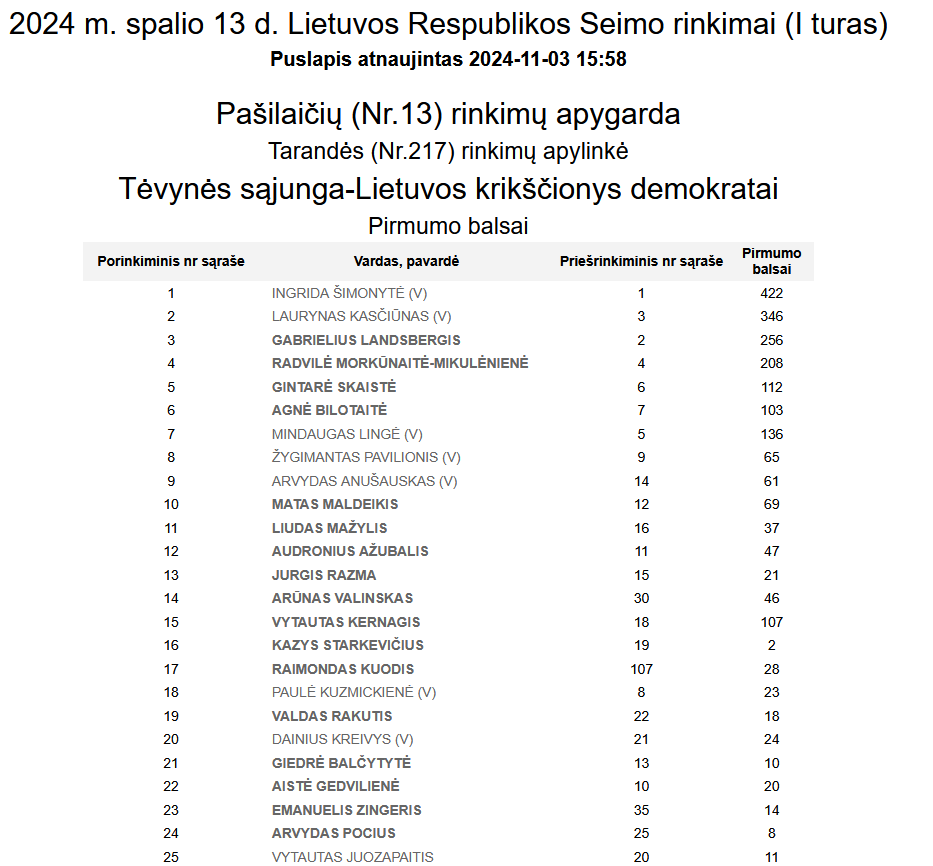

Top 4 in out list is the Dailidžių (Nr.35) apylinke in the Šalčininkų–Vilniaus (Nr.56) apygarda where Lietuvos lenkų rinkimų akcija-Krikščioniškų šeimų sąjunga (LLRA-KŠS) got 138 votes with a pirm rate of 4.47. The half voter threshold is 69 and is is passed by these candidates (rank in the final national party pirm vote ranking is given): 1, 11, 39.

The real standout of course is mister 39 or TADEUŠ RUDZIS who got 113 of 138 voters to cast pirm votes for him or 82% of voters. 

The listed Einamos pareigos (tarnyba) of candidates 11 and 39 include respectively Šalčininkų rajono savivaldybės vicemeras and Šalčininkų r. savivaldybės tarybos narys.

Top 3 is Baltosios Vokės (Nr.24) apylinke in the same apygarda where LLRA-KŠS got 534 votes with a pirm rate of 4.70. The half voter threshold is 267 and is is passed by these candidates: 2, 7, 29. Honourable mentions: 46 and 51 coming in at 247 and 262 pirm votes respectively.

Listed pareigos for 7, 29, 46, 51: Šalčininkų rajono savivaldybės vicemeras, Šalčininkų r. savivaldybės tarybos narys, Šalčininkų r. savivaldybės tarybos narė, Šalčininkų r. savivaldybės tarybos narė.

Top 2 is Akmenynės (Nr.28) apylinke in the same apygarda where LLRA-KŠS got 326 votes with a pirm rate of 4.79. The half voter threshold is 163 and is is passed by these candidates: 1, 7, 11. Honourable mentions: 73 with 101 pirm votes.

Listed pareigos for 7, 11, 73: Šalčininkų rajono savivaldybės vicemeras, Šalčininkų rajono savivaldybės vicemeras, Šalčininkų r. savivaldybės tarybos narė,  Socialinė pedagogė.

Top 1 is Jančiūnų (Nr.11) apylinke in the same apygarda where LLRA-KŠS got 157 votes with a pirm rate of 4.94. The half voter threshold is 78.5 and is is passed by these candidates: 1, 7, 8, 11, 39.

Listed pareigos for 7, 8, 11, 39: Šalčininkų rajono savivaldybės vicemeras, Trakų r. savivaldybės tarybos narys, Šalčininkų rajono savivaldybės vicemeras,  Šalčininkų r. savivaldybės tarybos narys.

# Outstanding performances

Numbers 7, 11 and 39 of LLRA-KŠS all of whom got at least 50% of voters to give them pirm votes in at least two dfferent apylinke. 